In [29]:
import pandas as pd
import numpy as np

In [30]:
import matplotlib.pyplot as plt 
import matplotlib 
from matplotlib import font_manager,rc

font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

In [31]:
대상 = pd.read_excel('소방대상물_합계.xlsx')

In [32]:
대상 = 대상.rename(columns={'합계':'소방대상물합계'})

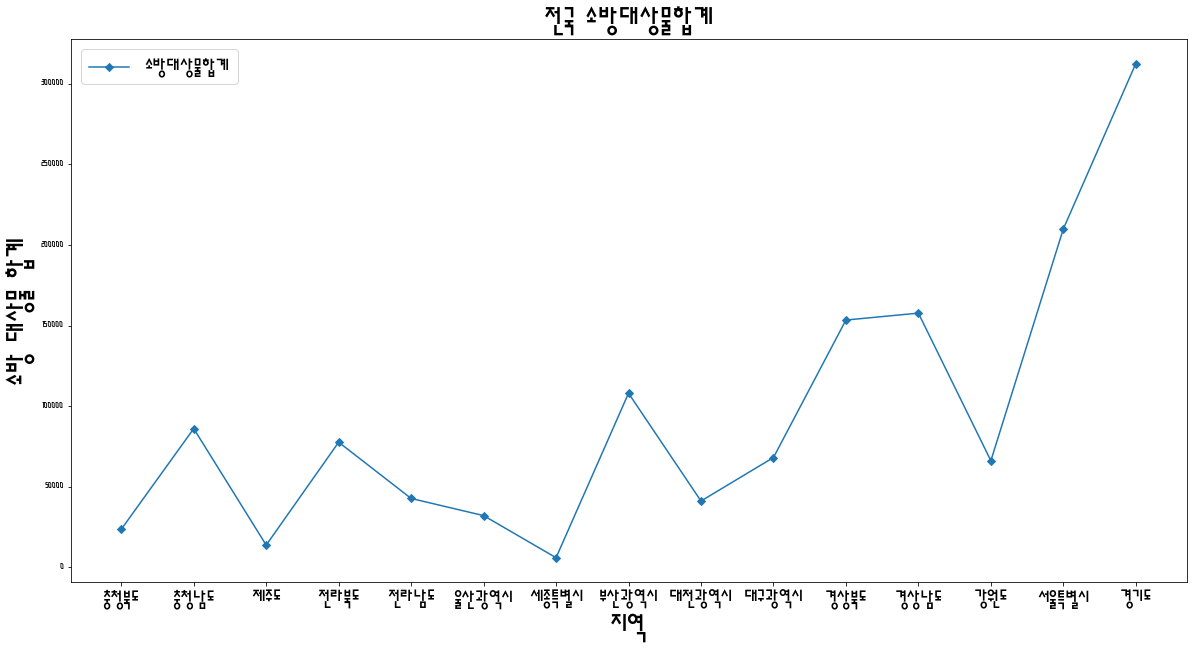

In [33]:
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.pyplot.xticks(fontsize=20)
plt.plot(대상.index, 대상['소방대상물합계'], marker='D')
plt.title('전국 소방대상물합계', fontsize=30)
plt.xlabel('지역', fontsize=30) 
plt.ylabel('소방 대상물 합계', fontsize=30) 
plt.legend(대상.columns, fontsize=20)

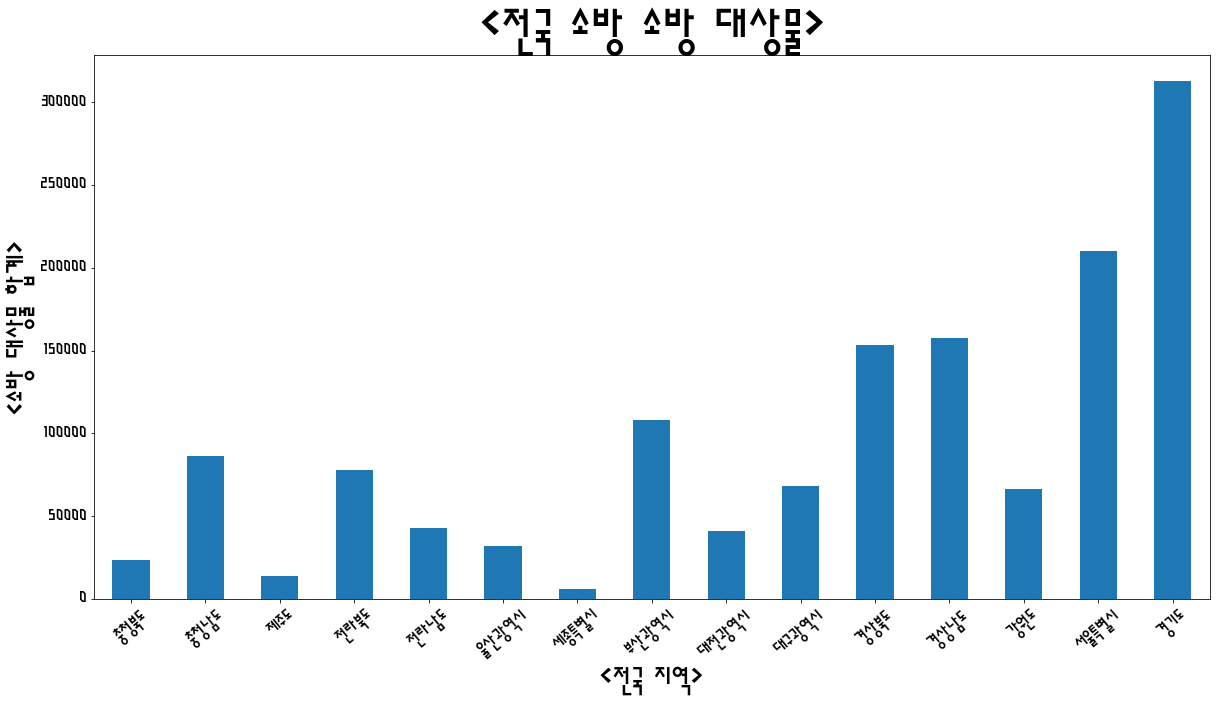

In [34]:
temp = 대상.plot(kind="bar", title="소방 대상물", legend=False, fontsize=20, rot='40')
plt.rcParams["figure.figsize"] = (10,20)
temp.set_title('<전국 소방 소방 대상물>', fontsize=50)
temp.set_xlabel('<전국 지역>', fontsize=30) 
temp.set_ylabel('<소방 대상물 합계>', fontsize=30) 
plt.show()

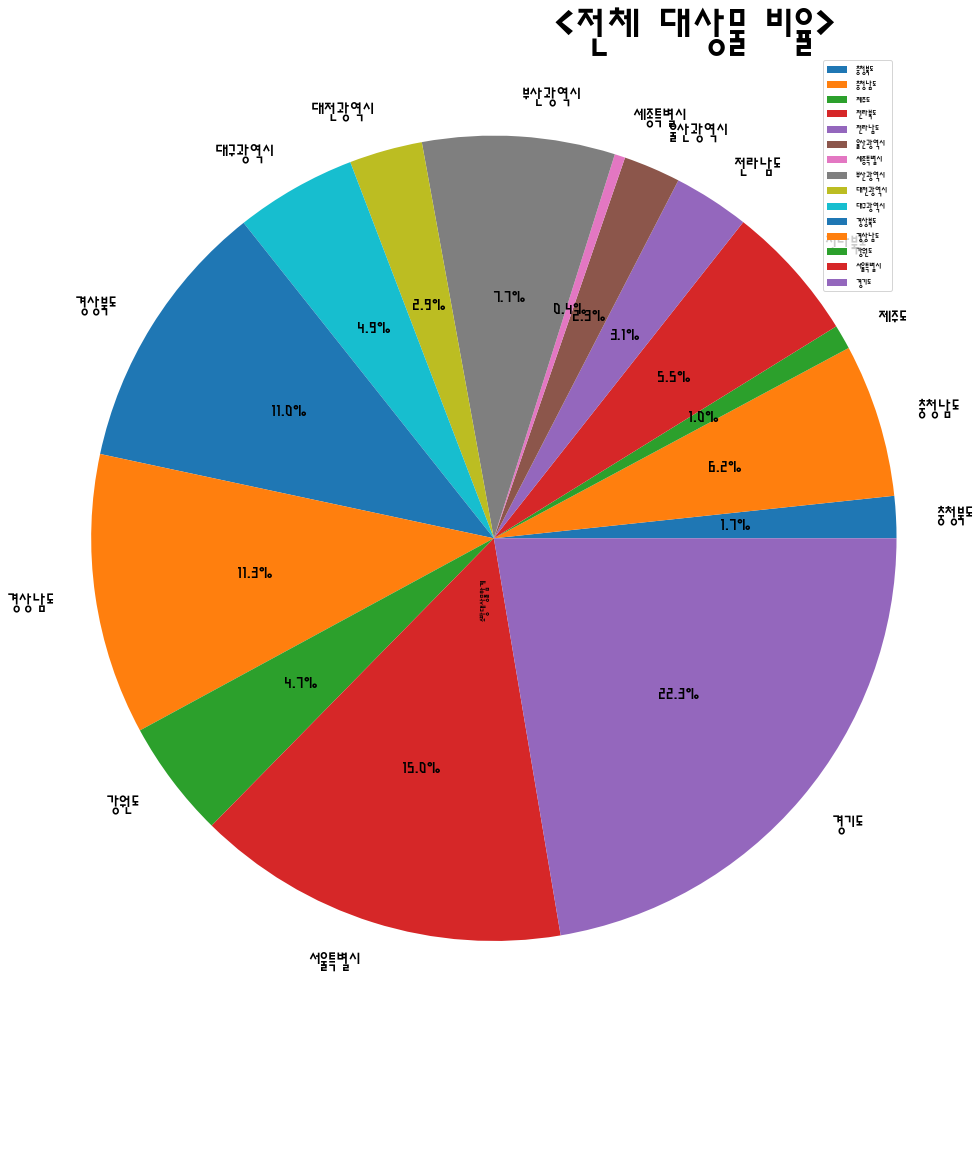

In [35]:
tile = 대상.plot.pie(autopct='%.1f%%', fontsize=20, subplots=True)
plt.title("<전체 대상물 비율>", fontsize=50)
plt.axis([0,1,-1.5,1.2])
plt.show()

In [36]:
화재 = pd.read_excel("화재 수정(10국).xlsx")

In [37]:
화재 = 화재.rename(columns={'행정구역별':'지역'})

In [38]:
화재 = 화재.set_index('지역')

In [39]:
화재_total = 화재['2017년 화재 발생 건수 (건)']

In [40]:
화재_total = pd.DataFrame(화재_total)

In [41]:
화재_total = 화재_total.rename(columns={'2017년 화재 발생 건수 (건)':'화재 발생 수'})

In [42]:
화재_total

화재 발생 수
지역            
서울특별시     5978
경기도      11407
강원도       2364
충청북도      1554
충청남도      4150
전라북도      1974
전라남도      3886
경상북도      4429
경상남도      7685
제주도        751

In [43]:
대상 = 대상 / 20

In [44]:
대상_total = 대상

In [45]:
대상_total = 대상_total.reset_index()

In [46]:
대상_total = 대상_total.sort_values(by='index',ascending=True)

In [47]:
대상_total = 대상_total.drop([7,8,9,6,3])

In [48]:
대상_total = 대상_total.rename(columns={'index':'지역'})

In [49]:
대상_total = 대상_total.set_index('지역')

In [50]:
대상_total

소방대상물합계
지역             
강원도     3307.15
경기도    15632.55
경상남도    7887.20
경상북도    7672.85
서울특별시  10500.50
울산광역시   1604.30
전라남도    2136.55
제주도      689.20
충청남도    4303.85
충청북도    1178.60

In [51]:
화재_total

화재 발생 수
지역            
서울특별시     5978
경기도      11407
강원도       2364
충청북도      1554
충청남도      4150
전라북도      1974
전라남도      3886
경상북도      4429
경상남도      7685
제주도        751

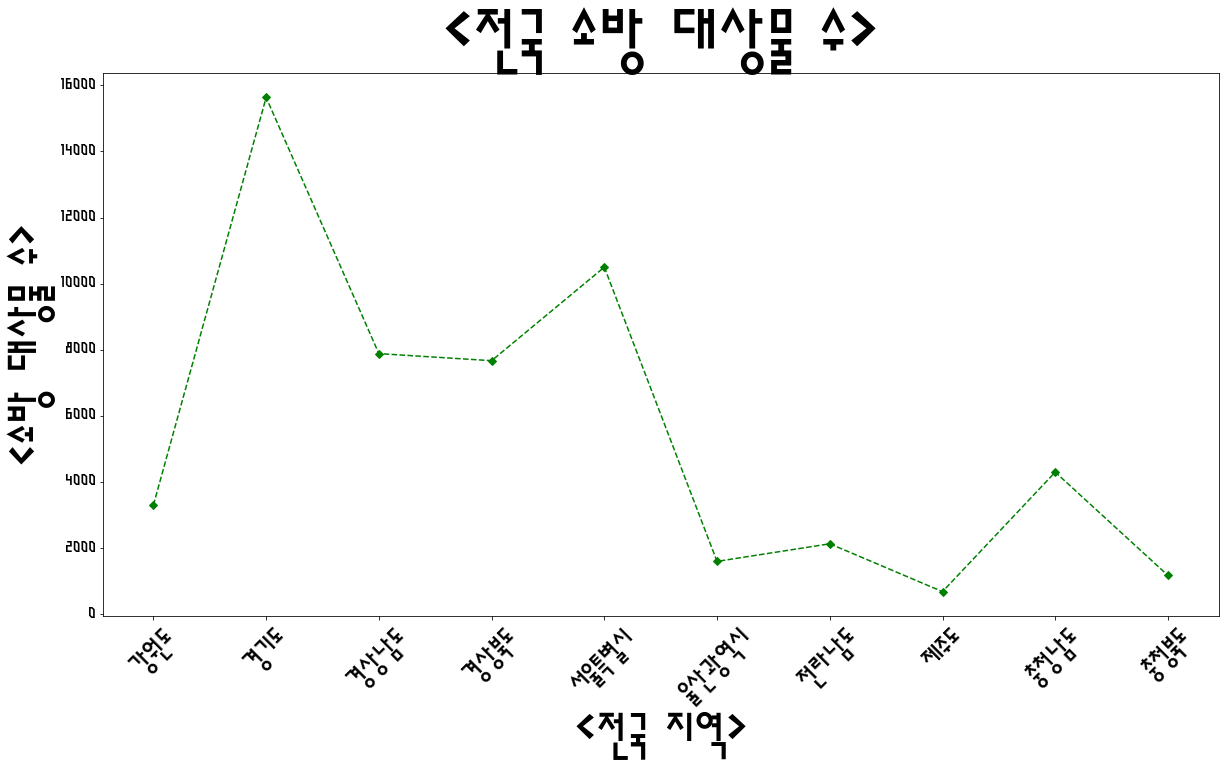

In [52]:
plt.rcParams["figure.figsize"] = (20, 10)
matplotlib.pyplot.xticks(fontsize=30)
matplotlib.pyplot.yticks(fontsize=20)
#sorted(pro1.index,reverse=True)     
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(sorted(대상_total.index,reverse=False), 대상_total, color="g", marker="D", linestyle="--")
plt.xticks(sorted(대상_total.index,reverse=False), 대상_total.index,rotation='45')
plt.title('<전국 소방 대상물 수>', fontsize=70)
plt.xlabel('<전국 지역>', fontsize=50) 
plt.ylabel('<소방 대상물 수>', fontsize=50) 

plt.show()

In [53]:
total = pd.merge(대상_total, 화재_total, on='지역', how='inner')

In [26]:
total

소방대상물합계  화재 발생 수
지역                      
강원도     3307.15     2364
경상남도    7887.20     7685
경상북도    7672.85     4429
서울특별시  10500.50     5978
전라남도    2136.55     3886
제주도      689.20      751
충청남도    4303.85     4150
충청북도    1178.60     1554

In [57]:
total = np.transpose(total)

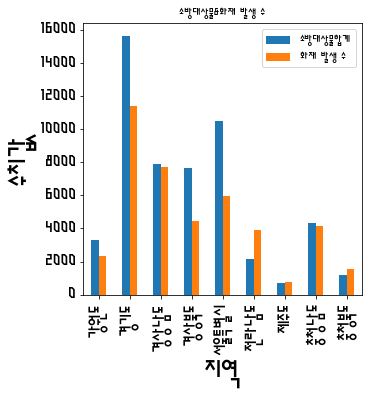

In [58]:
final = total.plot(kind="bar", title="소방대상물&화재 발생 수", legend=True, fontsize=20)
final.set_xlabel('지역', fontsize=30) 
final.set_ylabel('수치값', fontsize=30) 
final.legend(total.columns, fontsize=12)
plt.show()